<a href="https://colab.research.google.com/github/misbah38/assignmnet/blob/main/Animal_Classification_(CNN)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the important Libraries.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.image as imread
import pathlib
import random
from shutil import copyfile
import cv2
import imghdr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

**Upload the Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

 98% 572M/586M [00:07<00:00, 224MB/s]
100% 586M/586M [00:07<00:00, 84.4MB/s]


In [ ]:
!unzip -qq /content/animals10.zip

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Get all the paths
data_dir_list =os.listdir('/content/raw-img')
print(data_dir_list)
path,dirs,files=next(os.walk("/content/raw-img"))
file_count= len(files)
file_count

['cane', 'elefante', 'ragno', 'mucca', 'gallina', 'gatto', 'farfalla', 'scoiattolo', 'cavallo', 'pecora']


0

In [ ]:
# Assuming the dataset is downloaded, extracted and path is assigned to dataset_path
dataset_path = '/content/raw-img/'

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('raw-img')

Found 26179 files belonging to 10 classes.


In [ ]:
path = '/content/raw-img/'
category = os.listdir(path)

data = {"imgpath": [], "labels": []}

for folder in category:
    folderpath = os.path.join(path, folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)

df = pd.DataFrame(data)

# Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

In [ ]:
df.sample(n=15, random_state=1)

,imgpath,labels,encoded_labels
21590,/content/raw-img/scoiattolo/OIP-DsuvS3PGxSLBGH...,scoiattolo,9
6337,/content/raw-img/ragno/OIP-60h22q21LMbtfY8ThlF...,ragno,8
6032,/content/raw-img/elefante/OIP-e8Guavd1y-ux_IgU...,elefante,2
22295,/content/raw-img/cavallo/OIP-cKD909tMafbJJsg6H...,cavallo,1
20032,/content/raw-img/scoiattolo/OIP-ZoYZzBjBgliTbl...,scoiattolo,9
12065,/content/raw-img/mucca/OIP-mCtqTFSURGE5dOrWj1s...,mucca,6
24262,/content/raw-img/cavallo/OIP-YbQn_uBUJ4m2fAf0T...,cavallo,1
7979,/content/raw-img/ragno/OIP-nZkrWACFH7FdETNe1hM...,ragno,8
11235,/content/raw-img/mucca/OIP-N6QXgv2JLlSD5h_aiRZ...,mucca,6
3811,/content/raw-img/cane/OIP-pRz-9O7wQ9kT4_51WjDS...,cane,0


In [ ]:
df = df.loc[:, ['encoded_labels', 'labels']]
df


,encoded_labels,labels
0,0,cane
1,0,cane
2,0,cane
3,0,cane
4,0,cane
...,...,...
26174,7,pecora
26175,7,pecora
26176,7,pecora
26177,7,pecora


In [ ]:
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique())

print("---------------------------------------")
print("Number of images per category : ")
print(df.labels.value_counts())

Shape of the dataset:  (26179, 2)
_______________________________________
Number of null values: 
encoded_labels    0
labels            0
dtype: int64
_______________________________________
Number of unique values: 
encoded_labels    10
labels            10
dtype: int64
---------------------------------------
Number of images per category : 
cane          4863
ragno         4821
gallina       3098
cavallo       2623
farfalla      2112
mucca         1866
scoiattolo    1862
pecora        1820
gatto         1668
elefante      1446
Name: labels, dtype: int64


**Split Data into Train, test, Validation**

In [ ]:
train_df, Temp_df = train_test_split(df,  train_size= 0.80 , shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df ,  train_size= 0.60 , shuffle=True, random_state=124)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("---------- Train Dataset ----------")
print(train_df[["imgpath", "labels"]].head(5))
print("Train Dataset Shape:", train_df.shape)

print("\n-------- Validation Dataset --------")
print(valid_df[["imgpath", "labels"]].head(5))
print("Validation Dataset Shape:", valid_df.shape)

print("\n---------- Test Dataset ----------")
print(test_df[["imgpath", "labels"]].head(5))
print("Test Dataset Shape:", test_df.shape)

---------- Train Dataset ----------
                                             imgpath   labels
0  /content/raw-img/cane/OIP-GjcDlPezx-anj_1qZD2h...     cane
1  /content/raw-img/cavallo/OIP-E5kBbLOrxagymRe7-...  cavallo
2  /content/raw-img/pecora/OIP-oTlquFKx0Llu-RkDRl...   pecora
3  /content/raw-img/ragno/OIP-qhei-KiLjFhemWcJXbm...    ragno
4  /content/raw-img/cavallo/OIP-vyHba4hYr5EqFoZvv...  cavallo
Train Dataset Shape: (20943, 3)

-------- Validation Dataset --------
                                             imgpath      labels
0  /content/raw-img/cavallo/OIP-xUns0Y4a0eJzr0e1j...     cavallo
1  /content/raw-img/gallina/OIP-Q9qDXF-dDMD1OTlAx...     gallina
2  /content/raw-img/mucca/OIP-xLI-wXmRlAnrkYW4xDw...       mucca
3  /content/raw-img/cane/OIP-JLGPZd5C0lAPr4uvliRD...        cane
4  /content/raw-img/scoiattolo/OIP-4211HsSIHF0JUo...  scoiattolo
Validation Dataset Shape: (3141, 3)

---------- Test Dataset ----------
                                             imgpath  labels

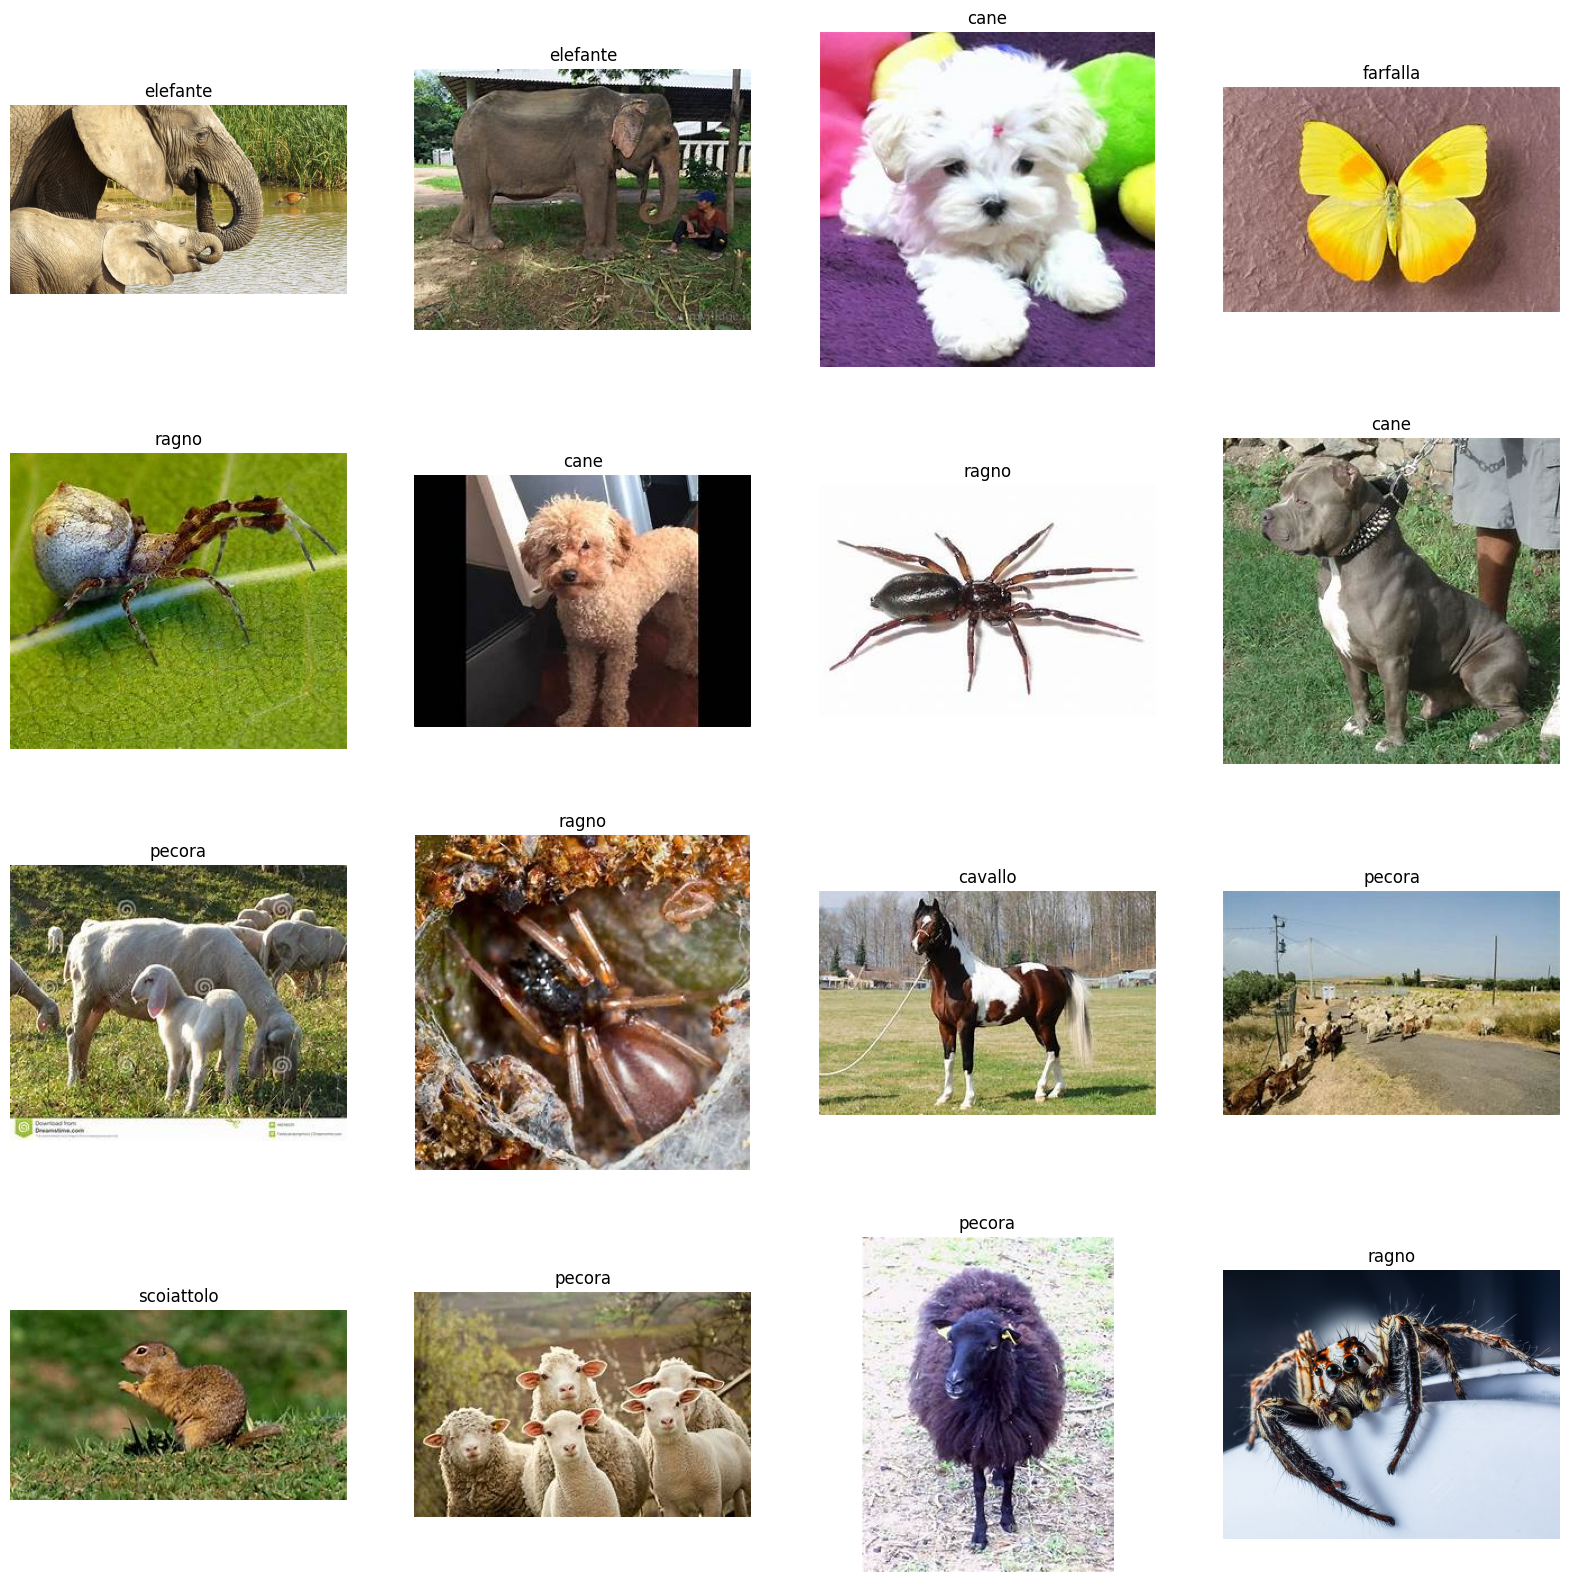

In [ ]:
plt.figure(figsize=(20,20))
for i, row in test_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [ ]:
# Load images and labels
image_size = (224, 224)
batch_size = 32

**Data Preprocessing**

In [ ]:
  # Prepare the data generators
generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

In [ ]:
%%time
# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
)

val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 20943 validated image filenames belonging to 10 classes.
Found 3141 validated image filenames belonging to 10 classes.
Found 2095 validated image filenames belonging to 10 classes.
CPU times: user 163 ms, sys: 64 ms, total: 227 ms
Wall time: 231 ms


**Model Structure**


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.EfficientNetB2(
    input_shape=(224, 224, 3),
    include_top=False, # we don`t need a pre-trained top layer (output layer)
    weights='imagenet',
    pooling='max'
)

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

**Model Building**

In [ ]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
], name='AugmentationLayer')



In [ ]:
inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(256)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x) # mixed_precision need separated Dense and Activation layers
model = Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.load_weights('./checkpoints/my_checkpoint')
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024  

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=15,
    callbacks=[
        EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True), # if val loss decreases for 10 epochs in a row, stop training,
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)


Epoch 1/15
655/655 [==============================] - 110s 115ms/step - loss: 1.8881 - accuracy: 0.4249 - val_loss: 0.6087 - val_accuracy: 0.8297 - lr: 1.0000e-05
Epoch 2/15
655/655 [==============================] - 68s 104ms/step - loss: 0.9289 - accuracy: 0.7090 - val_loss: 0.3501 - val_accuracy: 0.9086 - lr: 1.0000e-05
Epoch 3/15
655/655 [==============================] - 59s 90ms/step - loss: 0.6877 - accuracy: 0.7856 - val_loss: 0.2675 - val_accuracy: 0.9290 - lr: 1.0000e-05
Epoch 4/15
655/655 [==============================] - 59s 90ms/step - loss: 0.5769 - accuracy: 0.8180 - val_loss: 0.2229 - val_accuracy: 0.9392 - lr: 1.0000e-05
Epoch 5/15
655/655 [==============================] - 59s 90ms/step - loss: 0.5033 - accuracy: 0.8437 - val_loss: 0.2077 - val_accuracy: 0.9443 - lr: 1.0000e-05
Epoch 6/15
655/655 [==============================] - 62s 95ms/step - loss: 0.4520 - accuracy: 0.8621 - val_loss: 0.1904 - val_accuracy: 0.9494 - lr: 1.0000e-05
Epoch 7/15
655/655 [===========

**Display model performance**

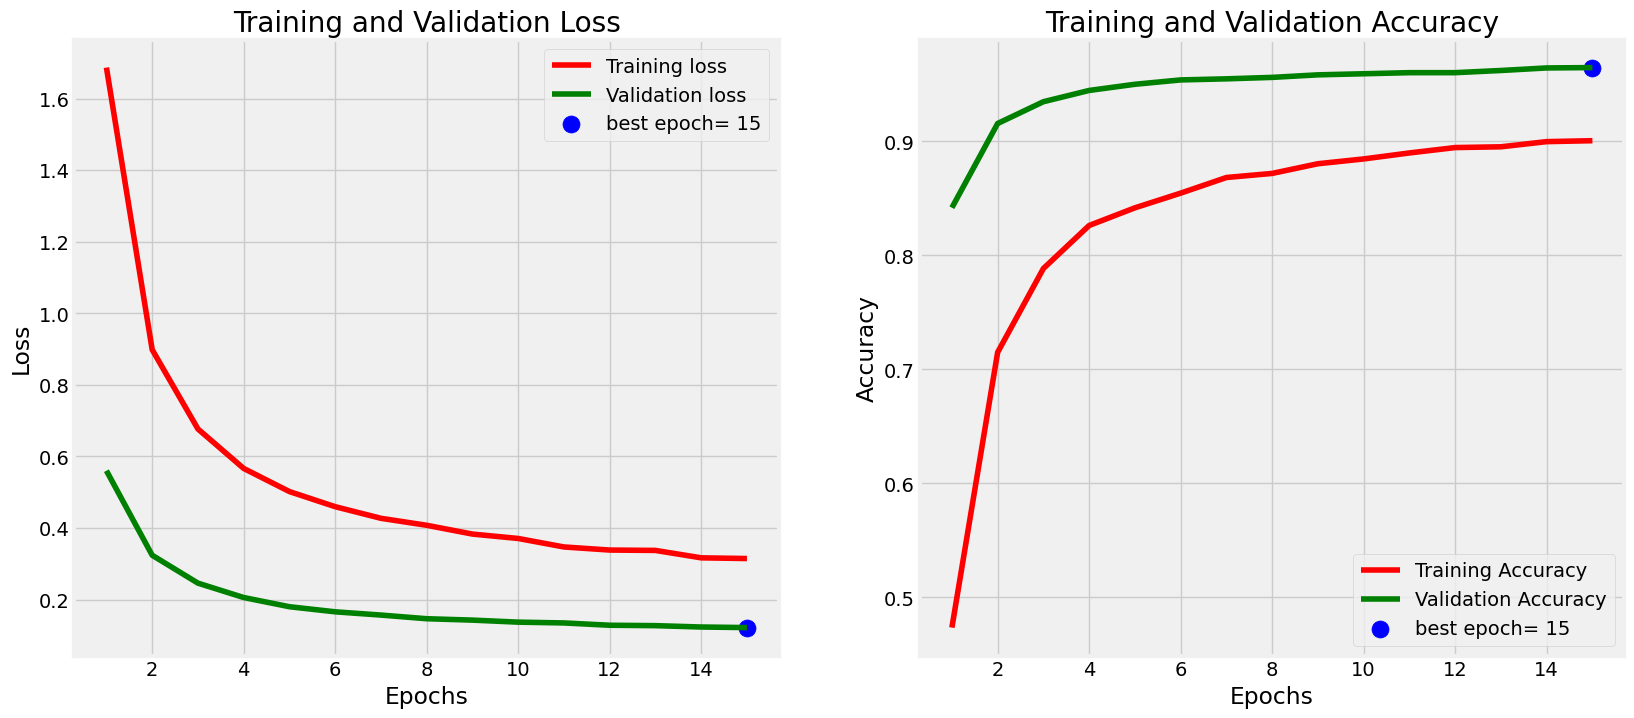

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

**Save the Model**

In [ ]:
saved_model_path = "CNN_model.h5"   #set path for your model
model.save(saved_model_path)

In [ ]:
from keras.models import load_model
my_model = load_model('CNN_model.h5')

In [ ]:
from google.colab import files
files.download('CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model Evaluation**

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.12177
Test Accuracy: 96.61%


In [ ]:
test_loss, test_acc = my_model.evaluate(test_images)
print(f"Test accuracy: {test_acc:.3f}")

66/66 [==============================] - 10s 75ms/step - loss: 0.1218 - accuracy: 0.9661
Test accuracy: 0.966


**F1 Score / Recall / Precision**

In [ ]:
from sklearn.metrics import classification_report, f1_score , confusion_matrix
y_true = test_images.classes
y_pred = np.argmax(model.predict(test_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))

66/66 [==============================] - 7s 75ms/step
F1 Score: 0.9613000370743656
              precision    recall  f1-score   support

        cane       0.96      0.98      0.97       393
     cavallo       0.96      0.96      0.96       198
    elefante       0.96      0.99      0.97       116
    farfalla       0.97      0.96      0.97       175
     gallina       0.99      0.97      0.98       261
       gatto       0.98      0.93      0.95       139
       mucca       0.90      0.93      0.92       162
      pecora       0.92      0.93      0.92       139
       ragno       0.99      0.99      0.99       364
  scoiattolo       0.99      0.96      0.98       148

    accuracy                           0.97      2095
   macro avg       0.96      0.96      0.96      2095
weighted avg       0.97      0.97      0.97      2095



In [ ]:
path='content/my_model.h5'

In [ ]:
loaded_model=tf.keras.models.load_model(path)

OSError: ignored

In [ ]:
test_loss, test_acc = my_model.evaluate(test_images)
print(f"Test accuracy: {test_acc:.3f}")

NameError: ignored